In [1]:
pip install pandas_datareader sklearn keras matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2014-04-26'
end = '2022-04-26'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-25,20.428213,20.141430,20.161785,20.426430,390275200.0,18.197517
2014-04-28,21.276787,20.448214,20.457144,21.217501,669485600.0,18.902271
2014-04-29,21.285000,21.053928,21.205000,21.154642,337377600.0,18.846270
2014-04-30,21.408215,21.064285,21.165714,21.074642,456640800.0,18.775003
2014-05-01,21.242857,20.941429,21.142857,21.124287,244048000.0,18.819229


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998
2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993
2022-04-25,163.169998,158.460007,161.119995,162.880005,95930300.0,162.880005
2022-04-26,162.209900,158.070007,162.250000,158.620697,62351172.0,158.620697


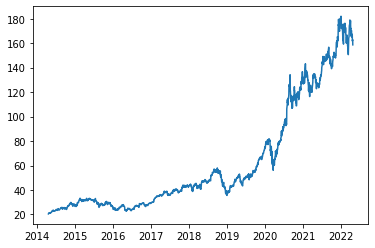

In [5]:
plt.plot(df.Close)

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-25,20.428213,20.141430,20.161785,20.426430,390275200.0,18.197517
2014-04-28,21.276787,20.448214,20.457144,21.217501,669485600.0,18.902271
2014-04-29,21.285000,21.053928,21.205000,21.154642,337377600.0,18.846270
2014-04-30,21.408215,21.064285,21.165714,21.074642,456640800.0,18.775003
2014-05-01,21.242857,20.941429,21.142857,21.124287,244048000.0,18.819229
...,...,...,...,...,...,...
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998
2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2014-04-25           NaN
2014-04-28           NaN
2014-04-29           NaN
2014-04-30           NaN
2014-05-01           NaN
                 ...    
2022-04-20    169.373200
2022-04-21    169.469300
2022-04-22    169.484800
2022-04-25    169.460600
2022-04-26    169.399107
Name: Close, Length: 2016, dtype: float64

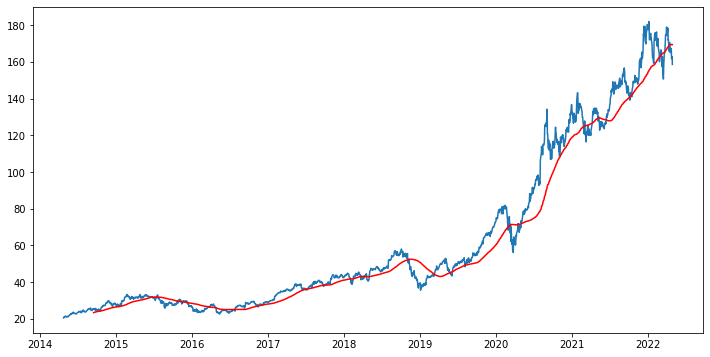

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
#Exponential rolling
ma200 = df.Close.rolling(200).mean()
ma200

Date
2014-04-25           NaN
2014-04-28           NaN
2014-04-29           NaN
2014-04-30           NaN
2014-05-01           NaN
                 ...    
2022-04-20    158.771000
2022-04-21    158.880250
2022-04-22    158.973000
2022-04-25    159.061850
2022-04-26    159.132454
Name: Close, Length: 2016, dtype: float64

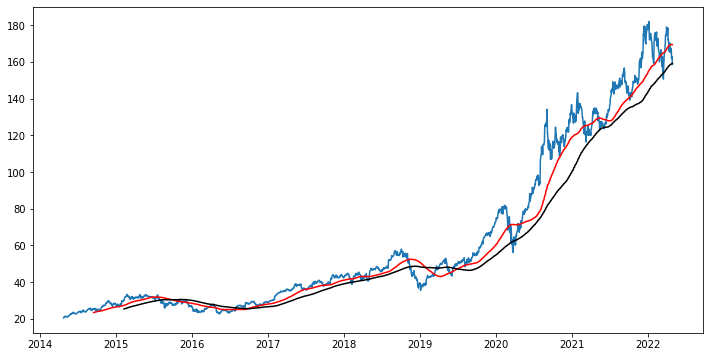

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'black')

In [11]:
df.shape

(2016, 6)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=2)


In [ ]:
model.summary()

In [ ]:
#model.compile(optimizer = 'adam',loss = 'mean_squared_error')
#model.fit(X_train,y_train,epochs = 10)

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Stock Predicition')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
print("The RMSE of the model is : ",rmse)